In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import math
from scipy.special import gamma
import numpy as np

In [265]:
os.listdir()



['Counter_time_trace_2023-03-20_153138.txt',
 'Counter_time_trace_2023-03-20_153225.txt',
 'Counter_time_trace_2023-03-20_153303.txt',
 'Counter_time_trace_2023-03-20_153341.txt',
 'Counter_time_trace_2023-03-20_153420.txt',
 'Counter_time_trace_2023-03-20_153458.txt',
 'Counter_time_trace_2023-03-20_153532.txt',
 'Counter_time_trace_2023-03-20_153617.txt',
 'Counter_time_trace_2023-03-20_153655.txt',
 'Counter_time_trace_2023-03-20_153731.txt',
 'Counter_time_trace_2023-03-20_153820.txt',
 'Counter_time_trace_2023-03-20_153905.txt',
 'Counter_time_trace_2023-03-20_153953.txt',
 'Counter_time_trace_2023-03-20_154035.txt',
 'Counter_time_trace_2023-03-20_154129.txt',
 'Counter_time_trace_2023-03-20_154234.txt',
 'Counter_time_trace_2023-03-20_154333.txt',
 'Counter_time_trace_2023-03-20_154412.txt',
 'Counter_time_trace_2023-03-20_154507.txt',
 'Counter_time_trace_2023-03-20_154545.txt',
 'Counter_time_trace_2023-03-20_154625.txt',
 'Counter_time_trace_2023-03-20_154702.txt',
 'Counter_

In [262]:
os.chdir('APD_stuff')

In [264]:
os.chdir(os.listdir()[4])

In [10]:


os.chdir('APD_stuff')
os.chdir('23_03_low_power_run')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'APD_stuff'

In [239]:
title =  os.listdir()[-10]
#title = 'Counter_time_trace_2023-03-20_155734.txt'
print(title)

24_04_bleaching_1855.txt


In [240]:
data = pd.read_table(title, delim_whitespace = True)


In [241]:
data.head()

,Time (ps),Channel 1 - Counts per bin
0,0,251
1,10000000000,232
2,20000000000,192
3,30000000000,232
4,40000000000,196


In [249]:
1e13*1e-12

10.0

In [243]:
x1 = data.columns[0]
y1 = data.columns[1]

Text(2, 200, '300uW incident power')

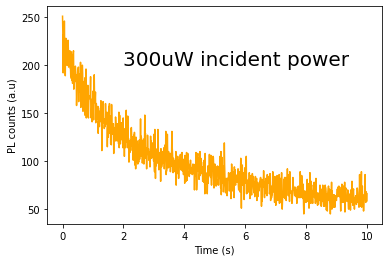

In [259]:
plt.xlabel('Time (s)')
plt.ylabel('PL counts (a.u)')
plt.plot(data[x1],data[y1], color = 'orange')
plt.text(2,200,'300uW incident power', fontsize=20)

In [49]:
data_counts = data[y1]

In [50]:
data_counts


0      3197
1      3274
2      3339
3      3363
4      3463
       ... 
995    4804
996    4770
997    4932
998    4829
999    4793
Name: Channel 1 - Counts per bin, Length: 1000, dtype: int64

In [51]:
data_counts=data_counts.to_numpy()

In [52]:
data[x1] = data[x1]/1e12

In [53]:
data[x1].iloc[-1]

9.99

Text(0.5, 0.98, 'PNC blinking data for Counter_time_trace_2023-03-20_162056.txt')

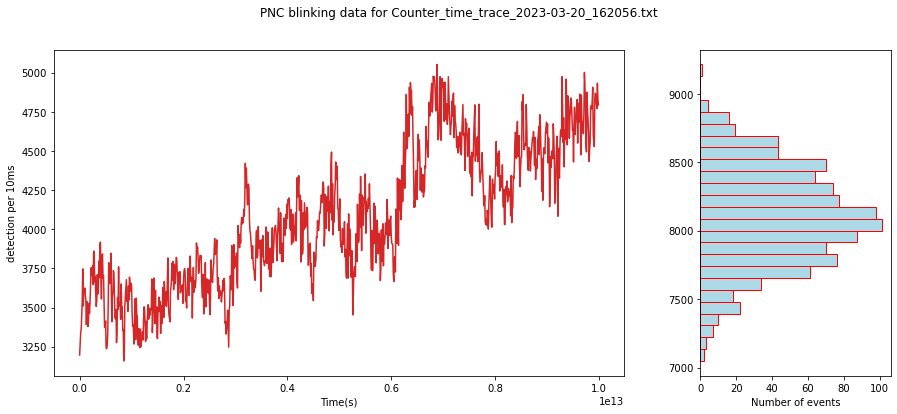

In [236]:
fig, (ax1,ax2)= plt.subplots(1,2,gridspec_kw={'width_ratios': [3, 1]},figsize=(15,6))
ax1.plot(x1,y1,'tab:red',data=data,)
ax2.hist(data_counts,bins=25,orientation='horizontal',color = "lightblue", ec="red")
ax1.set(xlabel='Time(s)',ylabel = 'detection per 10ms')
ax2.set(xlabel='Number of events')

fig.suptitle('PNC blinking data for '+ title) 
#fig.savefig(title+'_graph output')


In [55]:

def poissonian(x, l, a):
    return a*l**x*np.exp(-l)/gamma(x+1)

In [56]:
def gaussian(x, l, a):
    return a*np.exp(-(x-l)**2/(2*l))

In [115]:
i = 2

[2655.6697216   150.85424717]


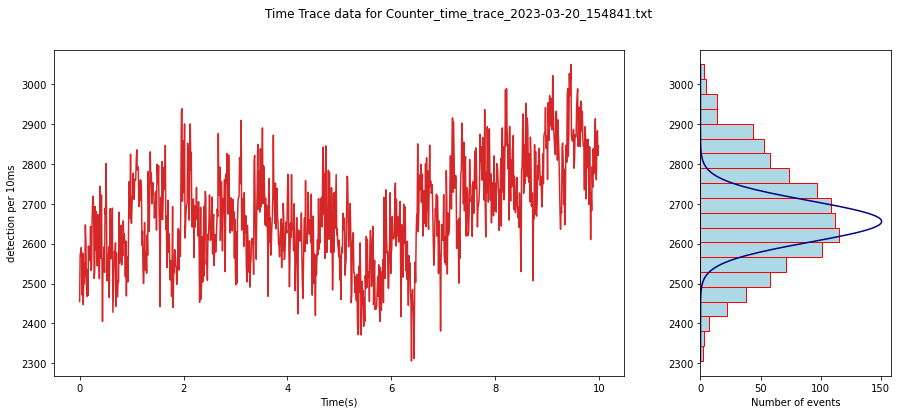

In [137]:
title =  os.listdir()[i]
data = pd.read_table(title, delim_whitespace = True)
x1 = data.columns[0]
y1 = data.columns[1]
data_counts = data[y1]
data_counts=data_counts.to_numpy()
data[x1] = data[x1]/1e12
fig, (ax1,ax2)= plt.subplots(1,2,gridspec_kw={'width_ratios': [3, 1]},figsize=(15,6))
ax1.plot(x1,y1,'tab:red',data=data,label='signal trace')
hist_counts, bins, _ = ax2.hist(data_counts,bins=20,orientation='horizontal',color = "lightblue", ec="red",label='Intensity bins')
vals = []
for j in range(1,len(bins)):
    vals.append((bins[j]+bins[j-1])/2)
p0 = [np.median(vals),max(hist_counts)]
#params, _ = curve_fit(poissonian, vals, hist_counts, p0=p0)
params, _ = curve_fit(gaussian, vals, hist_counts, p0=p0)
out = []
for j in vals:
    #out.append(poissonian(j, params[0],params[1]))
    out.append(gaussian(j, params[0], params[1]))
xval = np.linspace(bins.min(),bins.max(), 200)
ax2.plot(gaussian(xval, *params),xval, color='navy',label = 'Poissonian fit')
ax1.set(xlabel='Time(s)',ylabel = 'detection per 10ms')
ax2.set(xlabel='Number of events')

fig.suptitle('Time Trace data for '+ title) 
print(params)
i+=1

In [89]:
vals = []
for j in range(1,len(bins)):
    vals.append((bins[j]+bins[j-1])/2)
    
p0 = [4,1000]
params, _ = curve_fit(poissonian, vals, hist_counts, p0=p0)

C:\Users\hamps\AppData\Local\Temp\ipykernel_14040\1140599631.py:2: RuntimeWarning: overflow encountered in power
  return a*l**x*np.exp(-l)/gamma(x+1)
C:\Users\hamps\AppData\Local\Temp\ipykernel_14040\1140599631.py:2: RuntimeWarning: invalid value encountered in true_divide
  return a*l**x*np.exp(-l)/gamma(x+1)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [ ]:
print(bins)
print(hist_counts)

In [ ]:
plt.plot(vals, hist_counts, label='data')
out = []
for j in vals:
    out.append(poissonian(j, params[0],params[1]))
plt.plot(vals, out,label='fit')
plt.legend()

In [266]:
os.listdir()


['Counter_time_trace_2023-03-20_153138.txt',
 'Counter_time_trace_2023-03-20_153225.txt',
 'Counter_time_trace_2023-03-20_153303.txt',
 'Counter_time_trace_2023-03-20_153341.txt',
 'Counter_time_trace_2023-03-20_153420.txt',
 'Counter_time_trace_2023-03-20_153458.txt',
 'Counter_time_trace_2023-03-20_153532.txt',
 'Counter_time_trace_2023-03-20_153617.txt',
 'Counter_time_trace_2023-03-20_153655.txt',
 'Counter_time_trace_2023-03-20_153731.txt',
 'Counter_time_trace_2023-03-20_153820.txt',
 'Counter_time_trace_2023-03-20_153905.txt',
 'Counter_time_trace_2023-03-20_153953.txt',
 'Counter_time_trace_2023-03-20_154035.txt',
 'Counter_time_trace_2023-03-20_154129.txt',
 'Counter_time_trace_2023-03-20_154234.txt',
 'Counter_time_trace_2023-03-20_154333.txt',
 'Counter_time_trace_2023-03-20_154412.txt',
 'Counter_time_trace_2023-03-20_154507.txt',
 'Counter_time_trace_2023-03-20_154545.txt',
 'Counter_time_trace_2023-03-20_154625.txt',
 'Counter_time_trace_2023-03-20_154702.txt',
 'Counter_

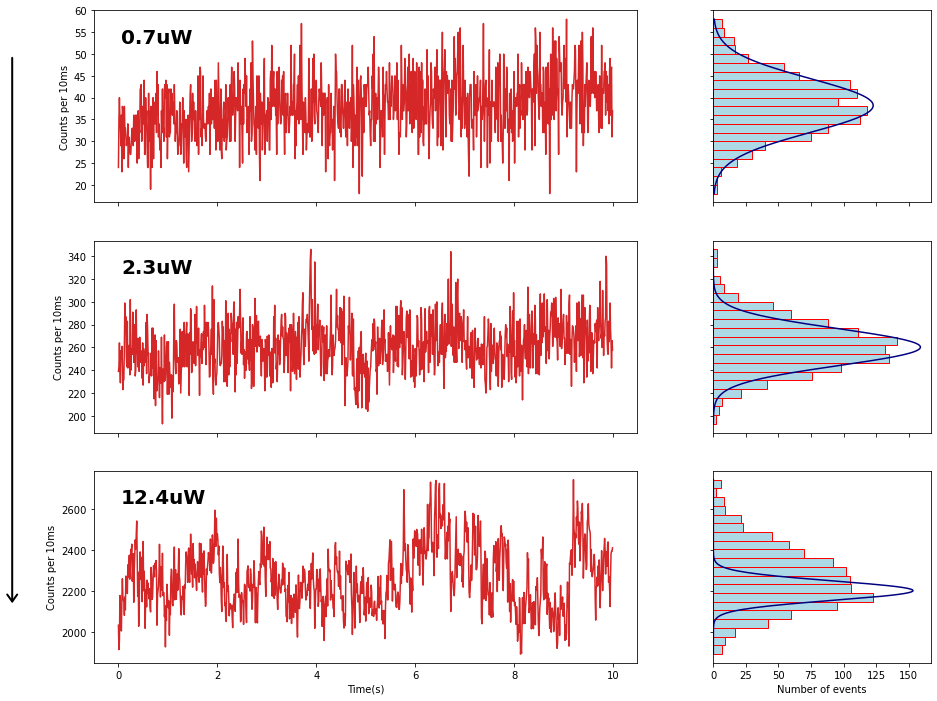

In [269]:
fig, axs = plt.subplots(nrows=3, ncols=2, gridspec_kw={'width_ratios': [5, 2]}, figsize=(15,12),sharey='row',sharex='col')
choices=[-31,-28,-15]
powers = [0.7,2.3,12.4]
for i,c in enumerate(choices):
    title =  os.listdir()[c]
    data = pd.read_table(title, delim_whitespace = True)
    x1 = data.columns[0]
    y1 = data.columns[1]
    data_counts = data[y1]
    data_counts=data_counts.to_numpy()
    data[x1] = data[x1]/1e12
    axs[i,0].plot(x1,y1,'tab:red',data=data,label='signal trace')
    hist_counts, bins, _ = axs[i,1].hist(data_counts,bins=20,orientation='horizontal',color = "lightblue", ec="red",label='Intensity bins')
    vals = []
    for j in range(1,len(bins)):
        vals.append((bins[j]+bins[j-1])/2)
    p0 = [np.median(vals),max(hist_counts)]
    #params, _ = curve_fit(poissonian, vals, hist_counts, p0=p0)
    params, _ = curve_fit(gaussian, vals, hist_counts, p0=p0)
    out = []
    for j in vals:
        #out.append(poissonian(j, params[0],params[1]))
        out.append(gaussian(j, params[0], params[1]))
    xval = np.linspace(bins.min(),bins.max(), 200)
    axs[i,1].plot(gaussian(xval, *params),xval, color='navy',label = 'Poissonian fit')
    axs[i,0].set(ylabel= 'Counts per 10ms')
    axs[i,0].annotate(str(powers[i])+'uW', xy=(0.05, 0.83), xycoords='axes fraction',
                 fontsize=20, fontweight='bold')
axs[2,0].set(xlabel='Time(s)')
axs[2,1].set(xlabel='Number of events')

axs[0, 0].annotate(" ", xy=(-0.15, -2.1), xytext=(-0.15, 0.8),
                    arrowprops=dict(facecolor='black', arrowstyle='->, head_width=0.5, head_length=0.7',linewidth=2),
                    horizontalalignment='center', verticalalignment='center',
                    xycoords='axes fraction', textcoords='axes fraction')
#axs[0,0].text(-2.5, 100, 'Increasing power', rotation=90, ha='center',fontsize=14)

plt.show()

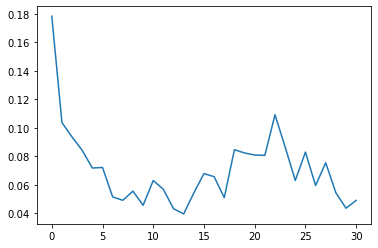

In [274]:
verperc = []
for i in os.listdir()[28:]:
    data = pd.read_table(i, delim_whitespace = True)
    y1 = data.columns[1]
    data_counts = data[y1]
    data_counts=data_counts.to_numpy()
    var = np.var(data_counts)
    mean = np.mean(data_counts)
    verperc.append(np.sqrt(var)/mean)
plt.plot(verperc)

['Counter_time_trace_2023-03-20_155734.txt',
 'Counter_time_trace_2023-03-20_155827.txt',
 'Counter_time_trace_2023-03-20_155919.txt',
 'Counter_time_trace_2023-03-20_160011.txt',
 'Counter_time_trace_2023-03-20_160101.txt',
 'Counter_time_trace_2023-03-20_160145.txt',
 'Counter_time_trace_2023-03-20_160232.txt',
 'Counter_time_trace_2023-03-20_160555.txt',
 'Counter_time_trace_2023-03-20_160641.txt',
 'Counter_time_trace_2023-03-20_160734.txt',
 'Counter_time_trace_2023-03-20_160918.txt',
 'Counter_time_trace_2023-03-20_161015.txt',
 'Counter_time_trace_2023-03-20_161101.txt',
 'Counter_time_trace_2023-03-20_161156.txt',
 'Counter_time_trace_2023-03-20_161314.txt',
 'Counter_time_trace_2023-03-20_161436.txt',
 'Counter_time_trace_2023-03-20_161527.txt',
 'Counter_time_trace_2023-03-20_161611.txt',
 'Counter_time_trace_2023-03-20_161717.txt',
 'Counter_time_trace_2023-03-20_161818.txt',
 'Counter_time_trace_2023-03-20_161908.txt',
 'Counter_time_trace_2023-03-20_162011.txt',
 'Counter_